In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import sklearn.datasets

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.decomposition import PCA

In [11]:
wine_dataset=sklearn.datasets.load_wine()

In [12]:
wine_dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [13]:
df=pd.DataFrame(data=wine_dataset.data,columns=wine_dataset.feature_names)

In [14]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [15]:
df['label']=wine_dataset.target

In [16]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [17]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [18]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol'>

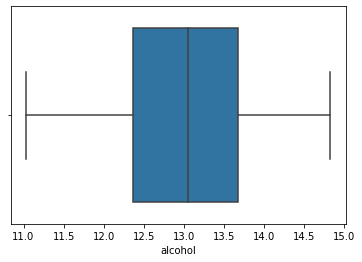

In [20]:
sns.boxplot(df['alcohol'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='malic_acid'>

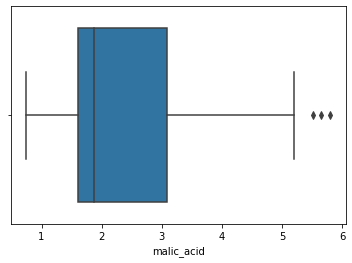

In [21]:
sns.boxplot(df['malic_acid'])

In [22]:
q1=df['malic_acid'].quantile(0.25)

In [23]:
q3=df['malic_acid'].quantile(0.75)

In [24]:
IQR=q3-q1

In [25]:
lower=q1-1.5*IQR

In [26]:
upper=q3+1.5*IQR

In [27]:
df=df[(df['malic_acid']>lower) & (df['malic_acid']<upper)]

In [28]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ash'>

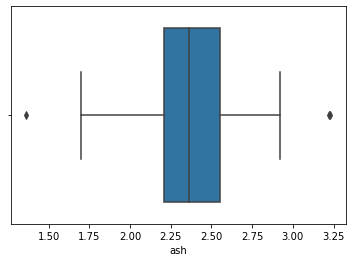

In [29]:
sns.boxplot(df['ash'])

In [30]:
q1=df['ash'].quantile(0.25)

In [31]:
q3=df['ash'].quantile(0.75)

In [32]:
IQR=q3-q1

In [33]:
lower=q1-1.5*IQR

In [34]:
upper=q3+1.5*IQR

In [35]:
df=df[(df['ash']>lower) & (df['ash']<upper)]

In [36]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcalinity_of_ash'>

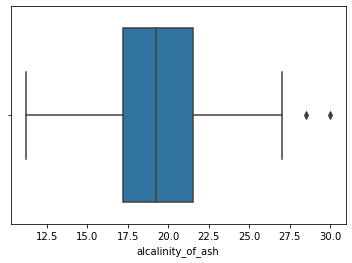

In [37]:

sns.boxplot(df['alcalinity_of_ash'])

In [38]:
q1=df['alcalinity_of_ash'].quantile(0.25)

In [39]:
q3=df['alcalinity_of_ash'].quantile(0.75)

In [40]:
IQR=q3-q1

In [41]:
lower=q1-1.5*IQR

In [42]:
upper=q3+1.5*IQR

In [43]:
df=df[(df['alcalinity_of_ash']>lower) & (df['alcalinity_of_ash']<upper)]

In [44]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='magnesium'>

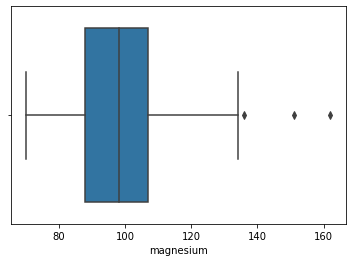

In [45]:
sns.boxplot(df['magnesium'])

In [46]:
q1=df['magnesium'].quantile(0.25)

In [47]:
q3=df['magnesium'].quantile(0.75)

In [48]:
IQR=q3-q1

In [49]:
lower=q1-1.5*IQR

In [50]:
upper=q3+1.5*IQR

In [51]:
df=df[(df['magnesium']>lower) & (df['magnesium']<upper)]

In [52]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_phenols'>

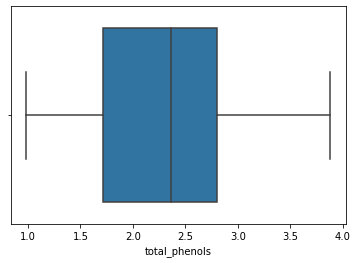

In [53]:
sns.boxplot(df['total_phenols'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='flavanoids'>

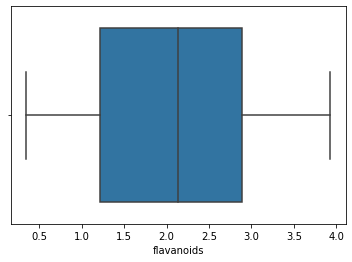

In [54]:
sns.boxplot(df['flavanoids'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nonflavanoid_phenols'>

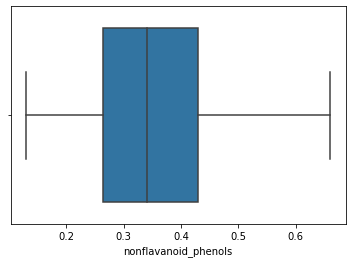

In [55]:
sns.boxplot(df['nonflavanoid_phenols'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='proanthocyanins'>

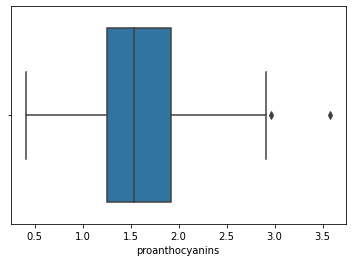

In [56]:
sns.boxplot(df['proanthocyanins'])

In [57]:
q1=df['proanthocyanins'].quantile(0.25)

In [58]:
q3=df['proanthocyanins'].quantile(0.75)

In [59]:
IQR=q3-q1

In [60]:
lower=q1-1.5*IQR

In [61]:
upper=q3+1.5*IQR

In [62]:
df=df[(df['proanthocyanins']>lower) & (df['proanthocyanins']<upper)]

In [63]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color_intensity'>

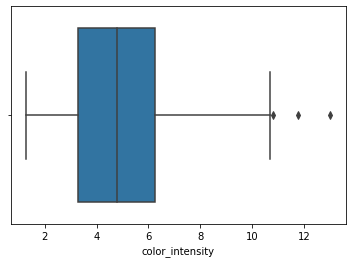

In [64]:
sns.boxplot(df['color_intensity'])

In [65]:
q1=df['color_intensity'].quantile(0.25)

In [66]:
q3=df['color_intensity'].quantile(0.75)

In [67]:
IQR=q3-q1

In [68]:
lower=q1-1.5*IQR

In [69]:
upper=q3+1.5*IQR

In [70]:
df=df[(df['color_intensity']>lower) & (df['color_intensity']<upper)]

In [71]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hue'>

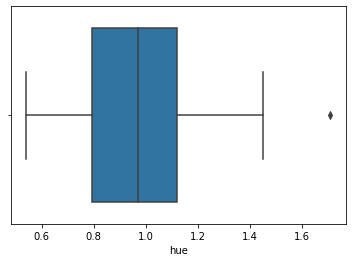

In [72]:
sns.boxplot(df['hue'])

In [73]:
q1=df['hue'].quantile(0.25)

In [74]:
q3=df['hue'].quantile(0.75)

In [75]:
IQR=q3-q1

In [76]:
lower=q1-1.5*IQR

In [77]:
upper=q3+1.5*IQR

In [78]:
df=df[(df['hue']>lower) & (df['hue']<upper)]

In [79]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='od280/od315_of_diluted_wines'>

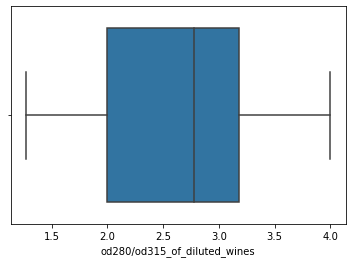

In [80]:
sns.boxplot(df['od280/od315_of_diluted_wines'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='proline'>

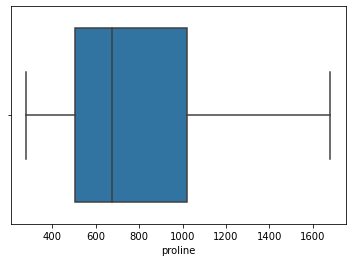

In [81]:
sns.boxplot(df['proline'])

In [82]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<AxesSubplot:xlabel='flavanoids', ylabel='total_phenols'>

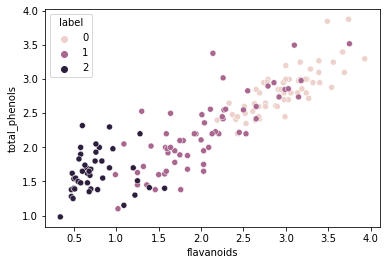

In [83]:
sns.scatterplot(x=df['flavanoids'],y=df['total_phenols'],hue=df['label'])

<AxesSubplot:xlabel='proanthocyanins', ylabel='total_phenols'>

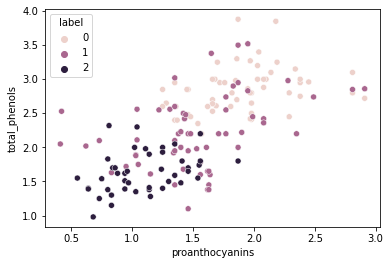

In [84]:
sns.scatterplot(x=df['proanthocyanins'],y=df['total_phenols'],hue=df['label'])

<AxesSubplot:xlabel='label', ylabel='alcohol'>

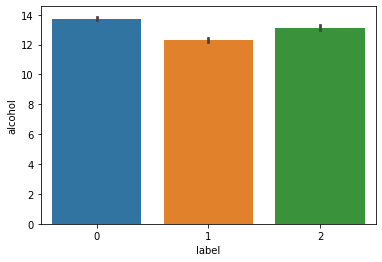

In [85]:
sns.barplot(x=df['label'],y=df['alcohol'])

<AxesSubplot:xlabel='label', ylabel='malic_acid'>

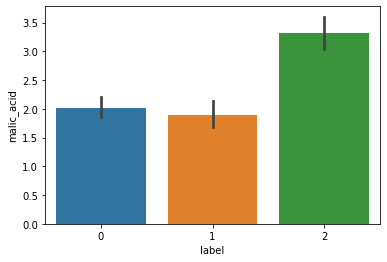

In [86]:
sns.barplot(x=df['label'],y=df['malic_acid'])

<AxesSubplot:xlabel='label', ylabel='ash'>

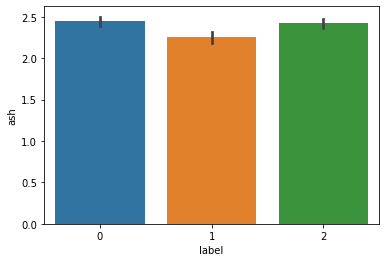

In [87]:
sns.barplot(x=df['label'],y=df['ash'])

<AxesSubplot:xlabel='label', ylabel='alcalinity_of_ash'>

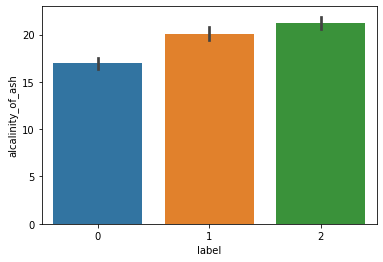

In [88]:
sns.barplot(x=df['label'],y=df['alcalinity_of_ash'])

<AxesSubplot:xlabel='label', ylabel='magnesium'>

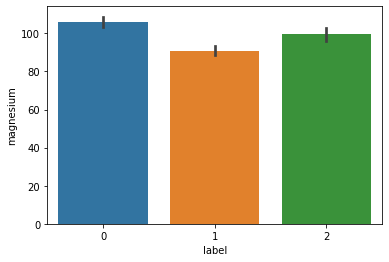

In [89]:
sns.barplot(x=df['label'],y=df['magnesium'])

<AxesSubplot:xlabel='label', ylabel='total_phenols'>

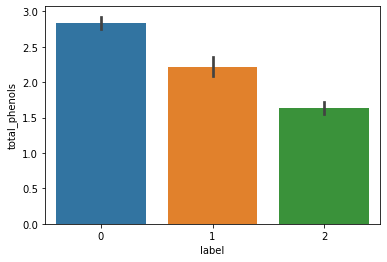

In [90]:

sns.barplot(x=df['label'],y=df['total_phenols'])

<AxesSubplot:xlabel='label', ylabel='flavanoids'>

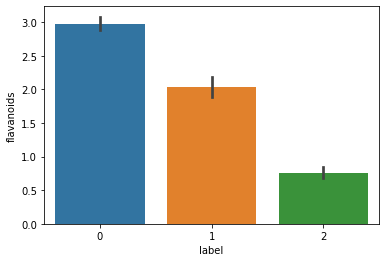

In [91]:
sns.barplot(x=df['label'],y=df['flavanoids'])

<AxesSubplot:xlabel='label', ylabel='nonflavanoid_phenols'>

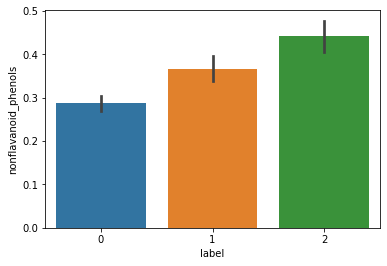

In [92]:

sns.barplot(x=df['label'],y=df['nonflavanoid_phenols'])

<AxesSubplot:xlabel='label', ylabel='proanthocyanins'>

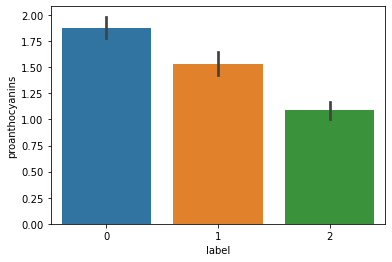

In [93]:
sns.barplot(x=df['label'],y=df['proanthocyanins'])

<AxesSubplot:xlabel='label', ylabel='color_intensity'>

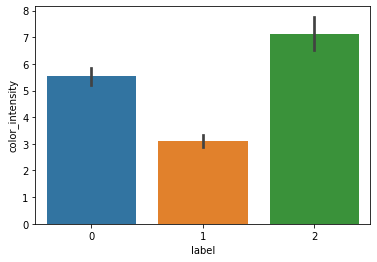

In [94]:
sns.barplot(x=df['label'],y=df['color_intensity'])

<AxesSubplot:xlabel='label', ylabel='hue'>

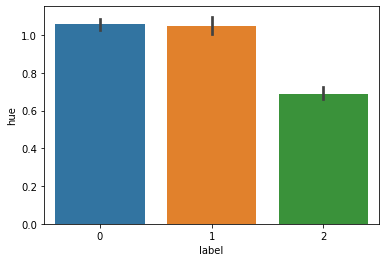

In [95]:
sns.barplot(x=df['label'],y=df['hue'])

<AxesSubplot:xlabel='label', ylabel='od280/od315_of_diluted_wines'>

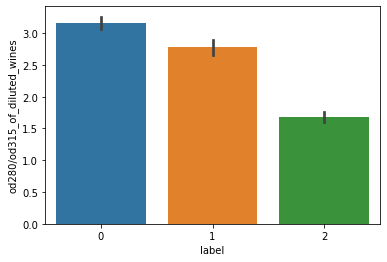

In [96]:
sns.barplot(x=df['label'],y=df['od280/od315_of_diluted_wines'])

<AxesSubplot:xlabel='label', ylabel='proline'>

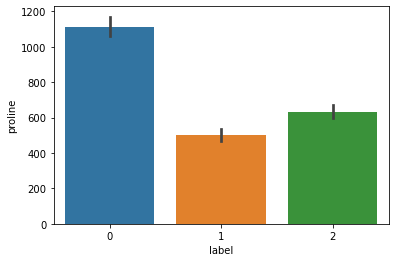

In [97]:
sns.barplot(x=df['label'],y=df['proline'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

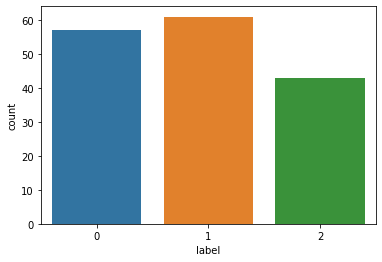

In [98]:
sns.countplot(df['label'])

In [99]:
df['label'].value_counts() #data set is balanaced 

1    61
0    57
2    43
Name: label, dtype: int64

In [100]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'label'],
      dtype='object')

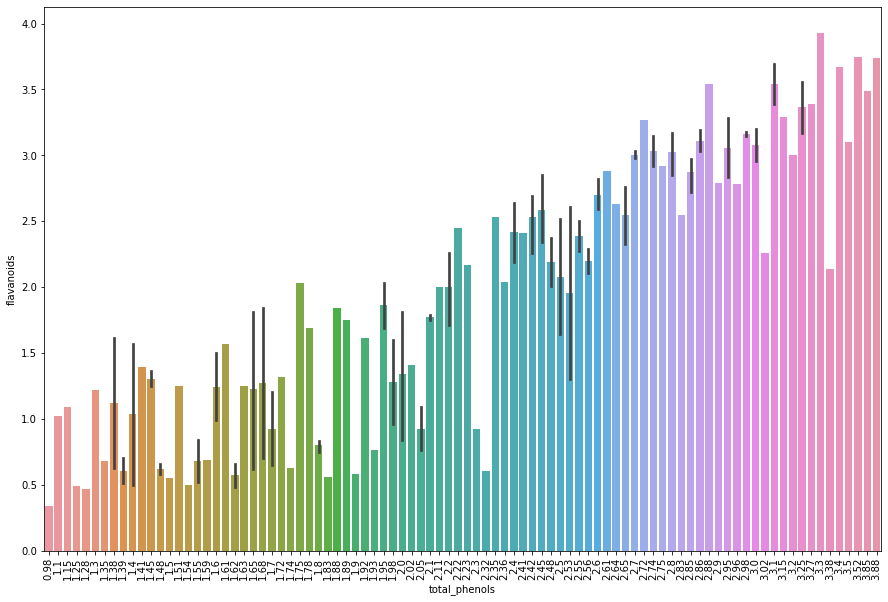

In [101]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['total_phenols'],y=df['flavanoids'])
plt.xticks(rotation=90)
plt.show()

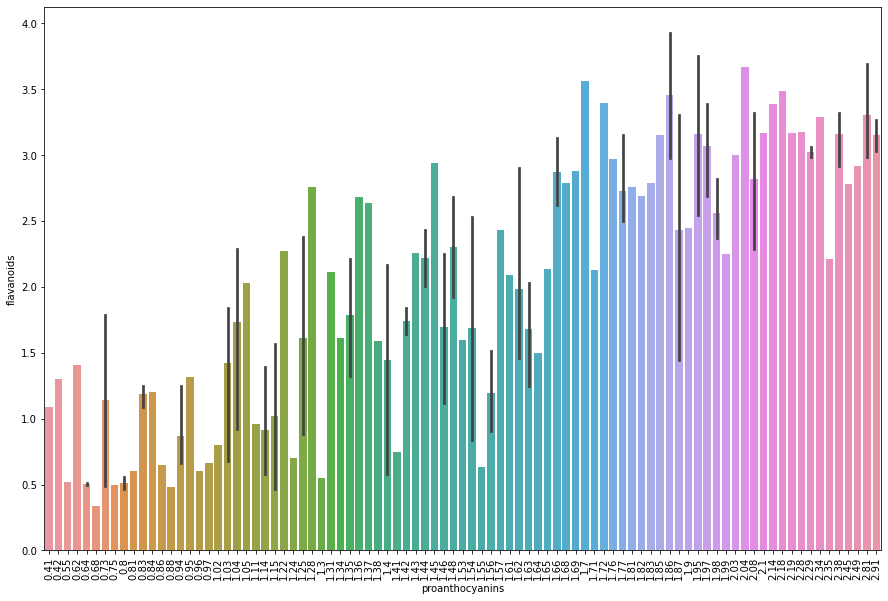

In [102]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['proanthocyanins'],y=df['flavanoids'])
plt.xticks(rotation=90)
plt.show()

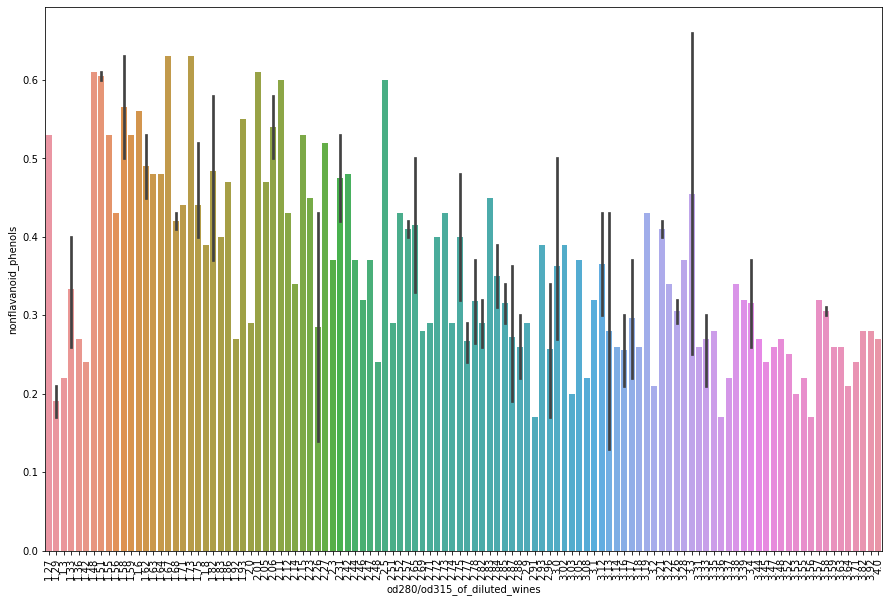

In [103]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['od280/od315_of_diluted_wines'],y=df['nonflavanoid_phenols'])
plt.xticks(rotation=90)
plt.show()

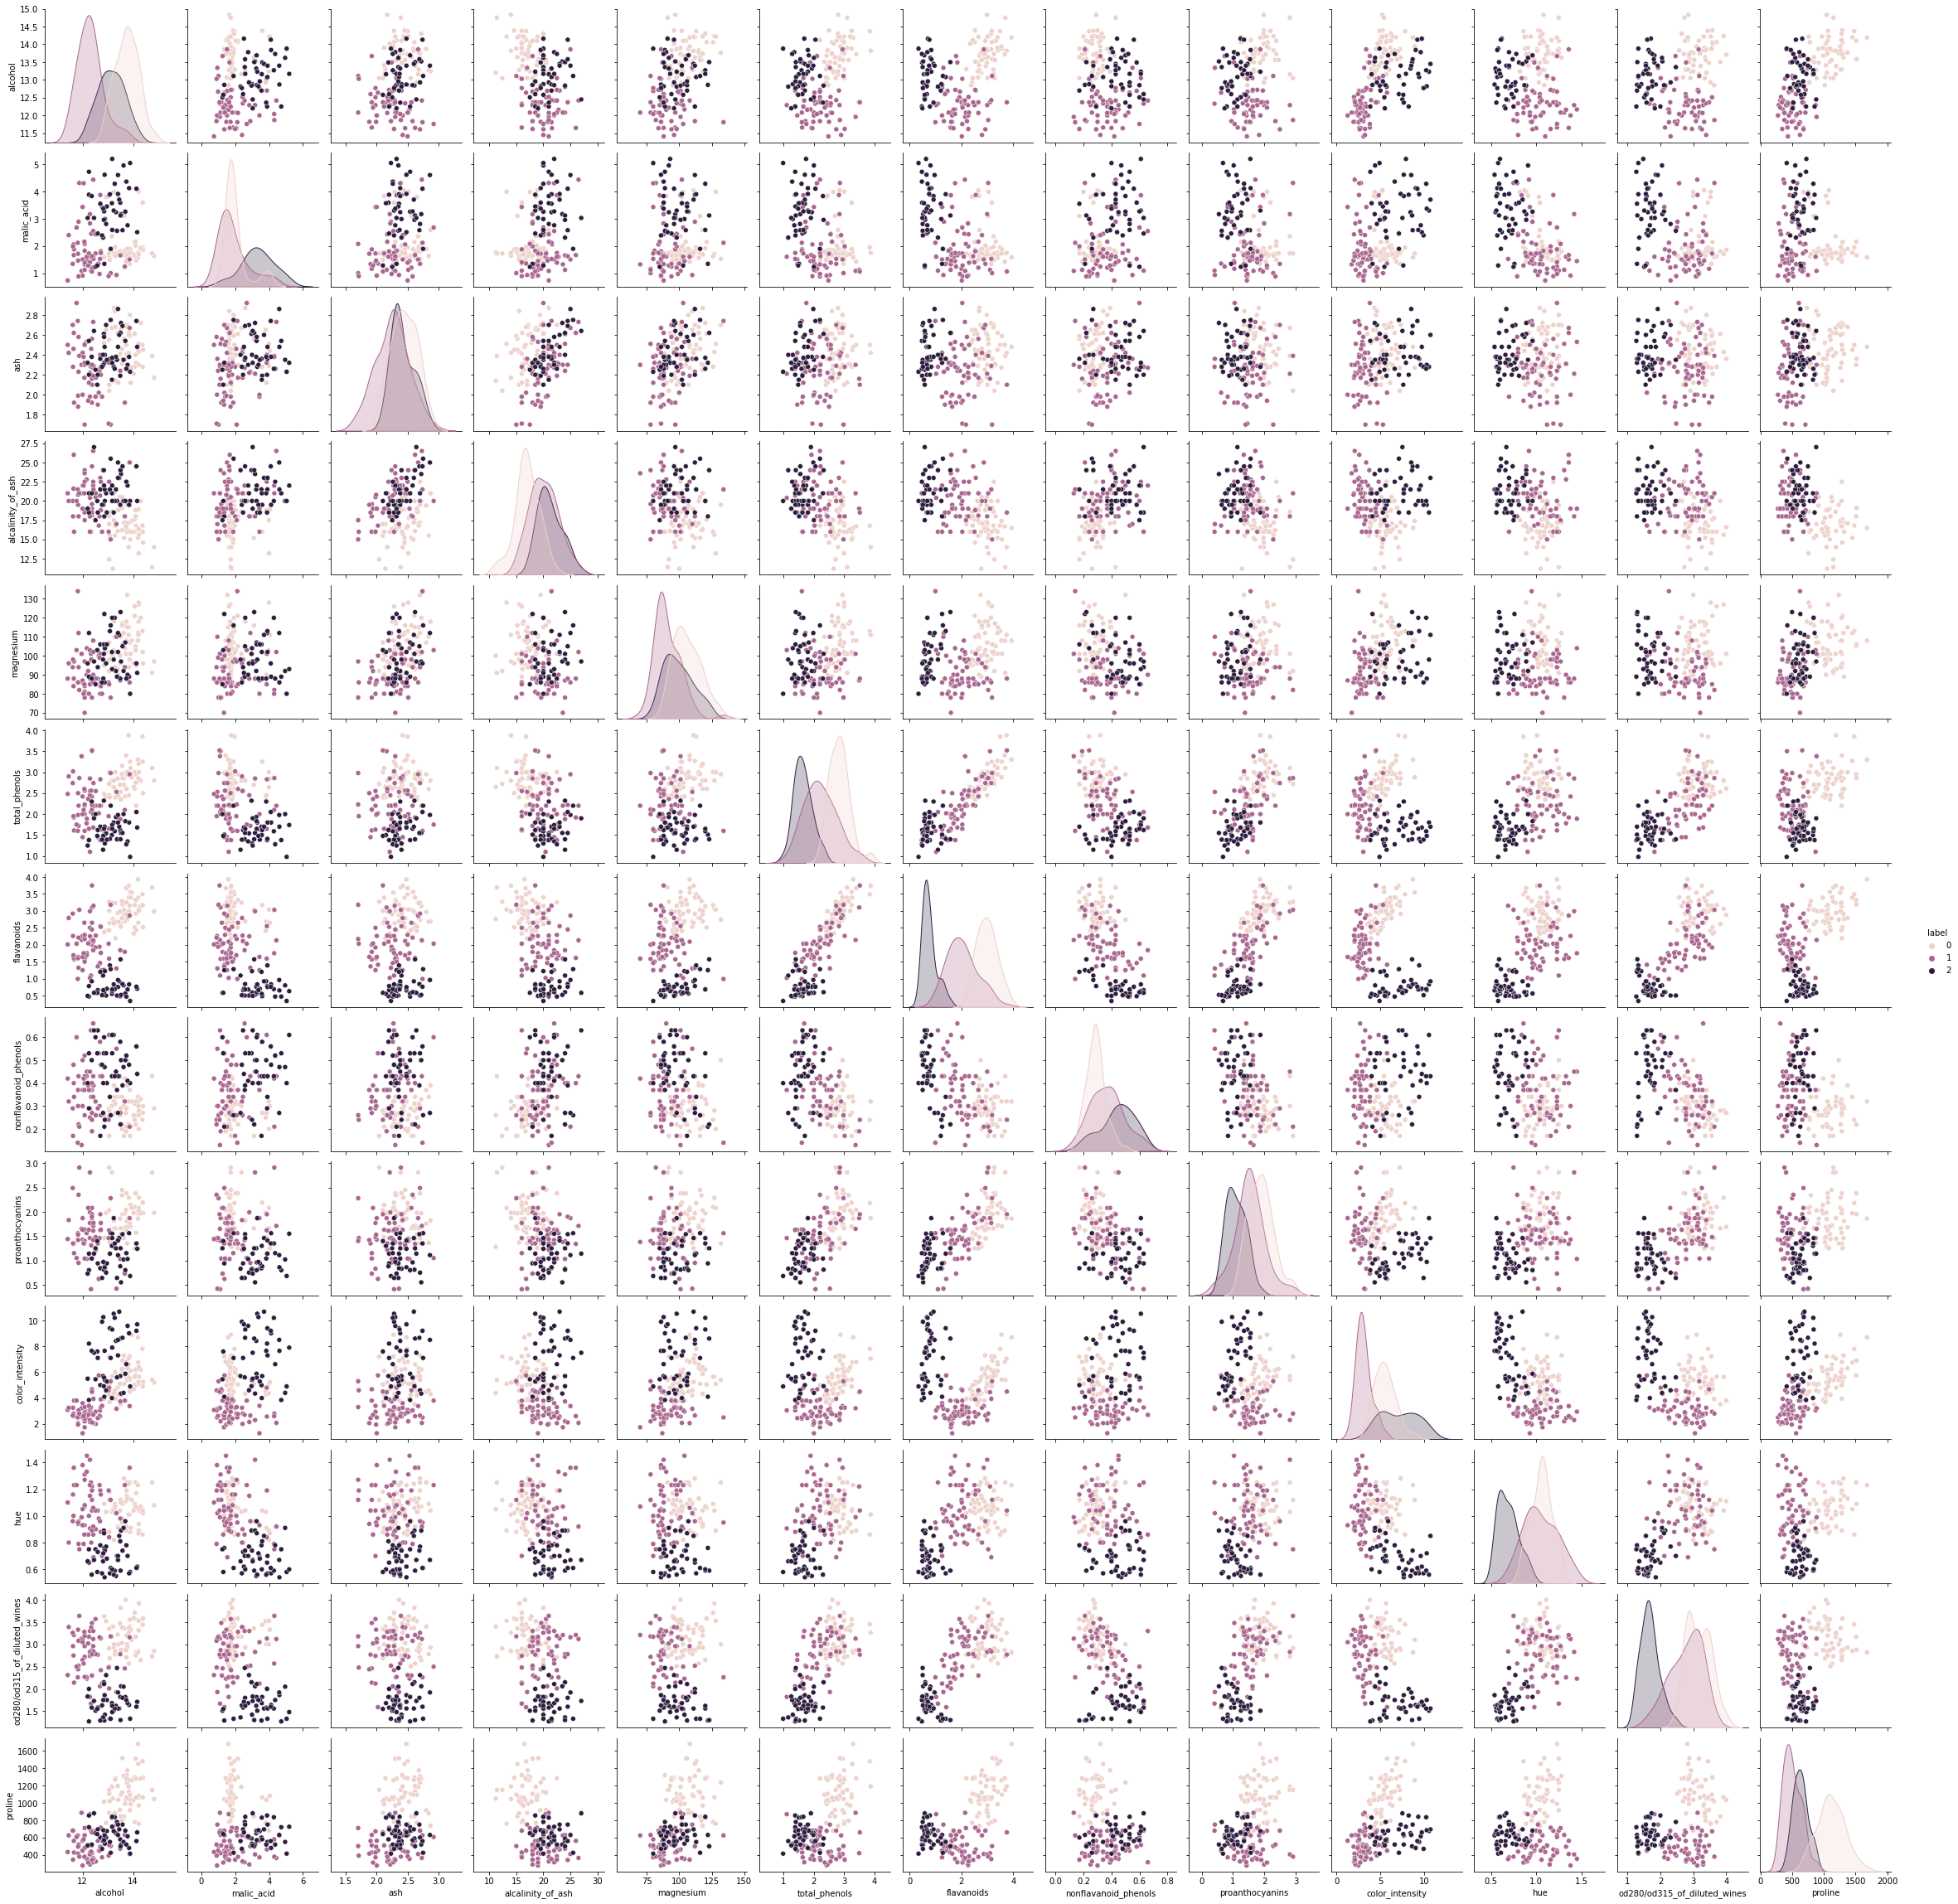

In [104]:
sns.pairplot(data=df,hue='label')

In [105]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'label'],
      dtype='object')

<AxesSubplot:>

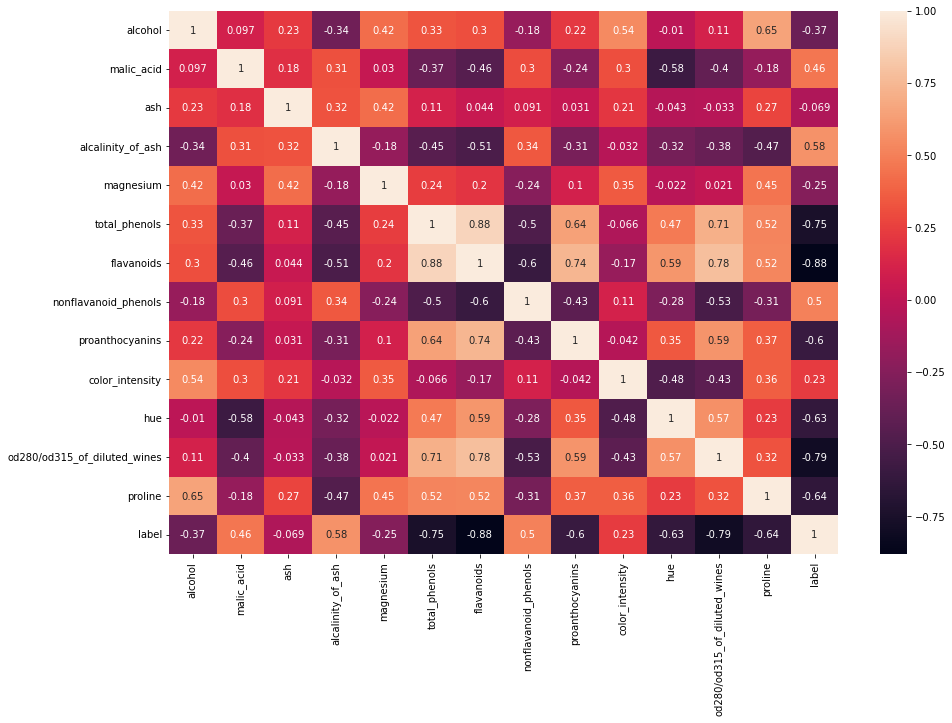

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [107]:
df=df.drop(['total_phenols','od280/od315_of_diluted_wines','alcohol'],axis=1)


In [108]:
y=df['label']

In [109]:
X=df.drop('label',axis=1)

In [110]:
sc=StandardScaler()


In [111]:
X=sc.fit_transform(X)

In [112]:
X

array([[-0.57916566,  0.27093638, -1.24814445, ...,  0.28209731,
         0.3833328 ,  0.98217445],
       [-0.51250719, -0.93153695, -2.73217522, ..., -0.30435749,
         0.42947949,  0.93483012],
       [ 0.03980581,  1.26608672, -0.23630529, ...,  0.30071492,
         0.33718612,  1.36092915],
       ...,
       [ 1.8681523 , -0.43396178,  0.23588631, ...,  2.40450513,
        -1.69326819,  0.25622795],
       [ 0.25882648,  0.02214879,  0.23588631, ...,  1.98560885,
        -1.6471215 ,  0.27200939],
       [ 1.69674482,  1.5563389 ,  1.75364505, ...,  1.93906482,
        -1.60097481, -0.61175157]])

In [113]:
y

0      0
1      0
2      0
3      0
4      0
      ..
172    2
174    2
175    2
176    2
177    2
Name: label, Length: 161, dtype: int32

In [114]:
pca=PCA(n_components=2)


In [115]:
pca

PCA(n_components=2)

In [116]:
x_pca=pca.fit_transform(X)


In [117]:
x_pca

array([[ 2.67411880e+00, -1.66046556e+00],
       [ 2.10440139e+00,  3.15664975e-01],
       [ 2.31730978e+00, -1.40385141e+00],
       [ 2.57283875e+00, -2.55091556e+00],
       [ 4.93467750e-01, -1.44101059e+00],
       [ 2.64754925e+00, -1.81650048e+00],
       [ 2.04057695e+00, -6.71875988e-01],
       [ 1.39174763e+00, -1.83592521e+00],
       [ 2.32735549e+00,  2.13191038e-01],
       [ 2.17572476e+00, -5.00034396e-01],
       [ 3.19217842e+00, -1.00478188e+00],
       [ 1.93072281e+00, -2.67748112e-03],
       [ 2.10196413e+00, -2.31274774e-01],
       [ 3.44772965e+00, -3.61796134e-03],
       [ 2.10103433e+00, -1.87795745e+00],
       [ 1.89458064e+00, -2.24012013e+00],
       [ 1.62233532e+00, -1.58086469e+00],
       [ 3.20157224e+00, -2.20490013e+00],
       [ 1.66194646e+00, -1.44751652e+00],
       [ 2.47750848e+00, -9.11468977e-01],
       [ 6.36412388e-01, -8.77231054e-01],
       [ 1.88356251e+00,  1.03209069e-01],
       [ 1.28713762e+00,  1.34767699e-01],
       [ 1.

In [118]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20, random_state=42)

In [119]:
lr=LogisticRegression()


In [120]:
lr.fit(X_train,y_train)

LogisticRegression()

In [121]:
y_pred=lr.predict(X_train)


In [122]:
accuracy_score(y_train,y_pred)

0.9375

In [123]:
y_pred=lr.predict(X_test)


In [124]:
accuracy_score(y_test,y_pred)

0.9696969696969697

In [125]:
KF=KFold(5)


In [126]:
scores=cross_val_score(lr,X,y)


In [127]:
scores

array([0.96969697, 0.96875   , 0.96875   , 1.        , 0.96875   ])

In [128]:
for fold_idx,value in enumerate(scores):
    print(fold_idx,value)

0 0.9696969696969697
1 0.96875
2 0.96875
3 1.0
4 0.96875


In [129]:
score_val=scores.mean()

In [130]:
score_val

0.975189393939394